
# <font color = blue> Project: Investigate a Dataset - [TMDb Movie Data] </font>
## _Table of Contents_
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## _Introduction_

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The original dataset is from [kaggle](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&source=editors&ust=1653952510963213&usg=AOvVaw3ZWXYOjLJ8zD26-2Sz_rME) and can be accessed [here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&source=editors&ust=1653952510962498&usg=AOvVaw28KvCPkexVXA9jf8aJr0aA).

>The objective of this analysis is to examine factors likely to determine the positive or negative rating of a movie.  
> A quick overview of the dataset shows there are **21** Columns: 
`['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']`
 
 > Some of these columns (like `director`, `genres`, `runtime`) can help us understand factors that influence viewers' rating of a movie.



### Questions we can answer with the analysis
1. Which genres are most popular from year to year?
2. What movies had the highest and lowest `budgets`?
3. What movies had the highest and lowest `revenues`?



In [2]:
# importing all packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01   14% |████▌                           | 1.5MB 22.8MB/s eta 0:00:01    46% |██████████████▉                 | 4.9MB 24.4MB/s eta 0:00:01    57% |██████████████████▍             | 6.0MB 25.2MB/s eta 0:00:01    68% |██████████████████████          | 7.2MB 23.6MB/s eta 0:00:01    91% |█████████████████████████████▎  | 9.6MB 22.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01  4% |█▌                              | 614kB 23.8MB/s eta 0:00:01    46% |███████████████                 | 6.3MB 22.8MB/s eta 0:00:01    80% |█████████████████████████▋      | 10.7MB 23.5MB/s eta 0:00:01    87% |████████████████████████████    | 11.7MB 21.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: p

<a id='wrangling'></a>
## _Data Wrangling_

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Loading dataset and displaying overview of data

df = pd.read_csv('tmdb_movies.csv')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [4]:
# inspecting data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# shape of data

df.shape
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

The data has 10866 rows and 21 columns.


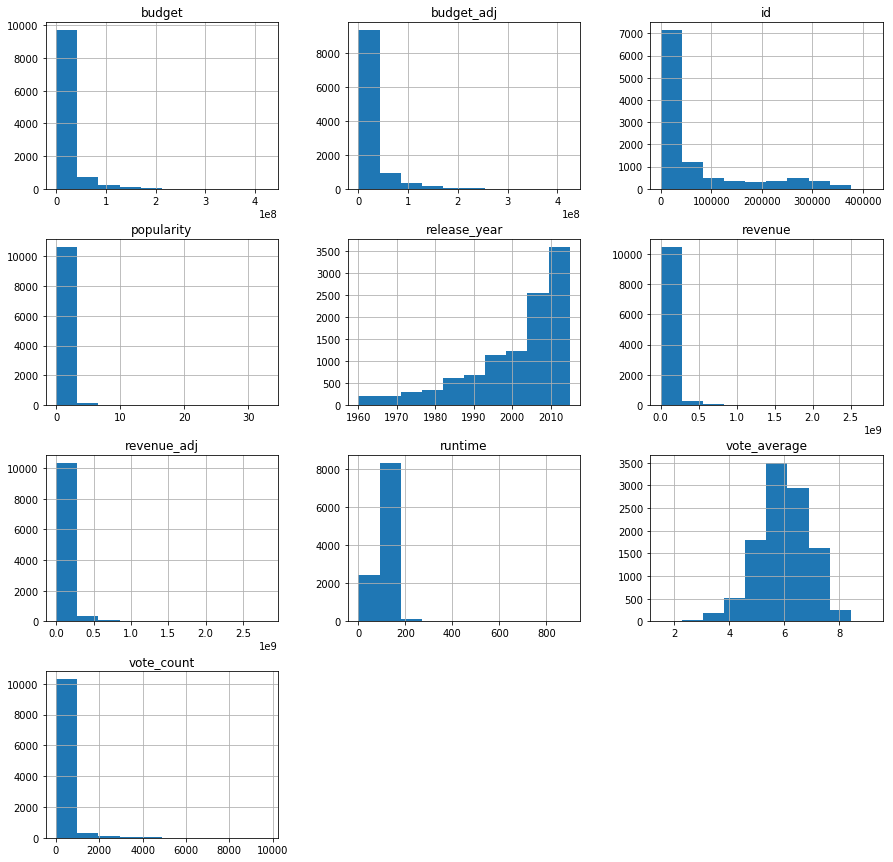

In [6]:
# View histogram display of each property to understand their distribution

df.hist(figsize = (15,15));

In [7]:
# check which rows have missing/null data

print(df.columns[df.isna().any()].tolist())

['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']


In [8]:
# investigate the datatypes

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [9]:
# perform overall descriptive analysis on the data

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


### Identifying problems in the data and Data Cleaning

> In this section, we look at the structure of the data, and identify problems in the data.
> This informs us on what needs to be cleaned

**Columns with null values:** `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `genres`, `production_companies`
> There are 9 columns that have at least a null value. While the first impulse might be to delete rows where there are null values, this is not always the solution. Valuable data might also be deleted when such rows are deleted.

`imdb_id` is a key column in the data as it helps in identifying the imdb ID for a movie. An overview of such data shows this rows will alter the analysis and report as they have no `budget` and `revenue`values. They also have null values in other columns, and this could be a case of incorrect data entry. So these rows will be deleted  


In [10]:
# check for duplicated rows
df[df.duplicated()]
df[df['imdb_id'] == 'tt0411951']
df.drop_duplicates(subset=None, keep='first', inplace=True)

# check again
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [11]:
# showing data with null imdb_id 
df[df['imdb_id'].isna()].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.11,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.50,2015,0.00,0.00
997,287663,NaN,0.33,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.80,2014,0.00,0.00
1528,15257,NaN,0.61,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,marvel comic|superhero|wolverine|hulk|norse my...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.90,2009,0.00,0.00
1750,101907,NaN,0.26,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,marvel comic|superhero|hulk|norse mythology|su...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.40,2009,0.00,0.00
2401,45644,NaN,0.07,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",NaN,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.60,2010,0.00,0.00


Deleting rows with null `imdb_id`.

>Some reference that helped is [here](https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25)

In [12]:
# drop imdb_id null rows and confirm

df = df.dropna(subset=['imdb_id'])
print(f"We now have {df.shape[0]} rows")
print(df.columns[df.isna().any()].tolist())

We now have 10855 rows
['cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']


In [19]:
# drop rows where revenue or budget is zero

df.drop(df[df['revenue'] == 0].index, inplace = True)
df.drop(df[df['budget'] == 0].index, inplace = True)

df[df['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [20]:
# since we would be making use of 'genres' in our analysis, we can all replace null values with a generic name, 'other_genre'
df[df['genres'].isna()]

df['genres'].fillna('other_genre', inplace=True)
df[df['genres'] == 'other_genre'].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


A movie can have more than one genre. The `genres` are delimited by pipe('|') and we can seperate these into different columns.
>This [reference](https://datascienceparichay.com/article/pandas-split-column-by-delimiter/) helped in getting this.

We then delete the original `genres` column


In [21]:
# expanding the genres column, addidng it to the dataframe, and deleting the redundant 'genres' column

df['genres'].head()
df[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5']] = df['genres'].str.split('|', expand = True)
df = df.drop(['genres'], axis = 1)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,Action,Crime,Thriller,None,None


<a id='eda'></a>
## _Exploratory Data Analysis_

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which genres are most popular from year to year?)

In [22]:
pd.set_option('display.max_rows', None)
df['release_year'].dtypes
df_pop_genres = df.groupby(['release_year', 'genre_1'], as_index=True)['popularity'].sum()
[df_pop_genres]

[release_year  genre_1        
 1960          Action              3.01
               Comedy              1.00
               Drama               2.61
 1961          Action              0.75
               Adventure           2.63
               Comedy              2.35
               Drama               0.82
               Horror              0.25
               Music               0.90
               Western             0.17
 1962          Adventure           4.34
               Crime               0.81
               Drama               0.70
               Western             1.03
 1963          Action              2.72
               Adventure           0.66
               Comedy              0.92
               Drama               0.80
               Horror              1.14
 1964          Adventure           3.15
               Comedy              2.80
               Crime               0.66
               Drama               3.03
 1965          Action              0.62
         

### <font color = green> _Inference_ </font>

> The genres data has been grouped by year to know how popular each genre was. 

### Research Question 2  (What movies had the highest and lowest budgets)

In [23]:
# define a function that calculates the maximum and minimum of each parameters that will later be stated

def max_min(parameter):
    max_index = df[parameter].idxmax()
    max_index_df = pd.DataFrame(df.loc[max_index])
    
    min_index = df[parameter].idxmin()
    min_index_df = pd.DataFrame(df.loc[min_index])
    
    result = pd.concat([max_index_df, min_index_df], axis = 1)
    
    return result

# What movies had the highest and lowest budgets
max_min('budget')

,2244,2618
id,46528,39964
imdb_id,tt1032751,tt0120836
popularity,0.25,0.09
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
homepage,http://www.iamrogue.com/thewarriorsway,NaN
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...


### <font color = green> _Inference_ </font>

> The movie, **The Warrior's Way** had the highest budget of _\\$425,000,000_ while **Lost & Found** had the lowest budget of \\$1

### Research Question 3  (What movies had the highest and lowest revenues)

In [24]:
# What movies had the highest and lowest revenue
max_min('revenue')

,1386,5067
id,19995,13537
imdb_id,tt0499549,tt0323944
popularity,9.43,0.46
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN


### <font color = green> _Inference_ </font>

> The movie, **Avatar** had the highest revenue of _\\$2,781,505,847_ while **Shattered Glass** had the lowest revenue of \\$2

<a id='conclusions'></a>
## _Conclusions_

> The study shows how the gap between the revenues and budget of two movies can be.


In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0